In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
df_all = pd.read_csv('reviews.csv',encoding = 'unicode_escape')
df_all.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,3/20/2011,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,3/28/2011,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,4/21/2011,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,5/13/2011,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,5/17/2011,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


In [3]:
df_all = df_all.dropna(how="any")
df_all.count()

listing_id       359110
id               359110
date             359110
reviewer_id      359110
reviewer_name    359110
comments         359110
dtype: int64

In [4]:
df_all['comments'] = df_all['comments'].apply(lambda row: row.encode('ascii',errors='ignore').decode())

In [6]:
### nltk and string transformations
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

### sklearn
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
import nltk
# nltk.download('vader_lexicon')

### numpy for seed.  
import numpy as np
from numpy import random

SEED = 1234

random.seed(SEED)

In [7]:
### Define simple space tokenizer
translator = str.maketrans('', '', string.punctuation)
tk = tokenize.simple.SpaceTokenizer()

In [10]:
# Creates the polarity rating for the reviews
analyzer = SentimentIntensityAnalyzer()

df_all['polarity_score']=df_all['comments'].apply(lambda x : str(analyzer.polarity_scores(x)["compound"]))

In [11]:
df_all['class'] = df_all['polarity_score'].astype(float).apply(lambda x : 'positive' if x > 0.500 else 'negative')

class_names = ['negative', 'positive']

In [12]:
df_all['polarity_class'] = df_all['polarity_score'].astype(float).apply(lambda x : 1 if x > 0.500 else 0)

In [13]:
df_all.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_score,class,polarity_class
0,44077,203703,3/20/2011,393348,Christian,We enjoyed our stay very much. The room was co...,0.9513,positive,1
1,44077,211369,3/28/2011,444004,Solidea,We have been here 4 nights. Stay in a home is ...,0.985,positive,1
2,44077,234215,4/21/2011,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...,0.9836,positive,1
3,44077,261843,5/13/2011,490005,Weston,"No surprises, was as described. Very gracious...",0.9447,positive,1
4,44077,268148,5/17/2011,520460,Barbara,"Teresa was a lovely hostess, and we had a deli...",0.9835,positive,1


In [14]:
count_review_all = df_all["class"].value_counts()
count_review_all

positive    290954
negative     68156
Name: class, dtype: int64

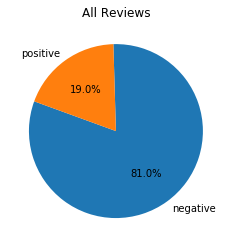

In [15]:
plt.pie(count_review_all, labels=class_names, autopct="%1.1f%%", startangle=160)
plt.title("All Reviews")
plt.show()